In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] =(200)
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df=pd.read_excel(r"C:\Users\Abhishek\Downloads\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


<Axes: >

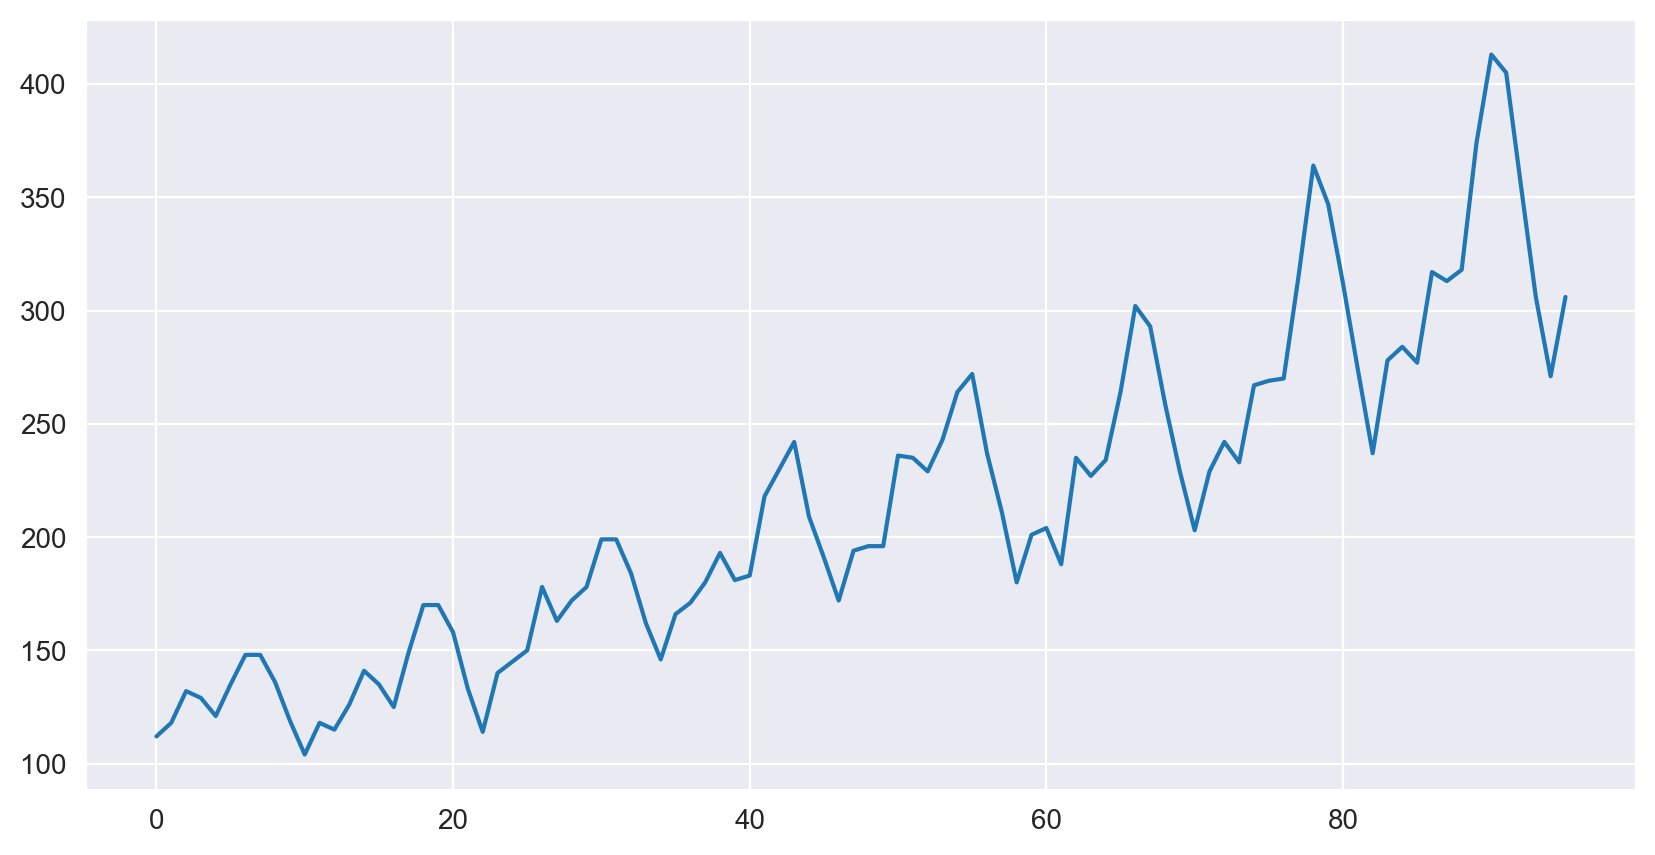

In [6]:
df.Passengers.plot()

In [7]:
import statsmodels.formula.api as smf 

In [8]:
df['log_y']=np.log(df['Passengers'])
df['t']=np.arange(1,len(df)+1)
df['t_square']=df['t']**2
df

,Month,Passengers,log_y,t,t_square
0,1995-01-01,112,4.718499,1,1
1,1995-02-01,118,4.770685,2,4
2,1995-03-01,132,4.882802,3,9
3,1995-04-01,129,4.859812,4,16
4,1995-05-01,121,4.795791,5,25
...,...,...,...,...,...
91,2002-08-01,405,6.003887,92,8464
92,2002-09-01,355,5.872118,93,8649
93,2002-10-01,306,5.723585,94,8836
94,2002-11-01,271,5.602119,95,9025


In [9]:
# Date Extraction
df["Date"] = pd.to_datetime(df.Month,format="%Y-%m")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y")  # year extraction


In [10]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [11]:
months_dummies = pd.DataFrame(pd.get_dummies(df['month']))
months_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
df = pd.concat([df,months_dummies], axis = 1)
df

,Month,Passengers,log_y,t,t_square,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,4.718499,1,1,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,4.770685,2,4,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,4.882802,3,9,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4.859812,4,16,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,4.795791,5,25,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,6.003887,92,8464,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,5.872118,93,8649,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,5.723585,94,8836,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,5.602119,95,9025,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
df['t_squared'] = df['t']*df['t']
df['log_passengers'] = np.log(df['Passengers'])

<Axes: xlabel='year', ylabel='Passengers'>

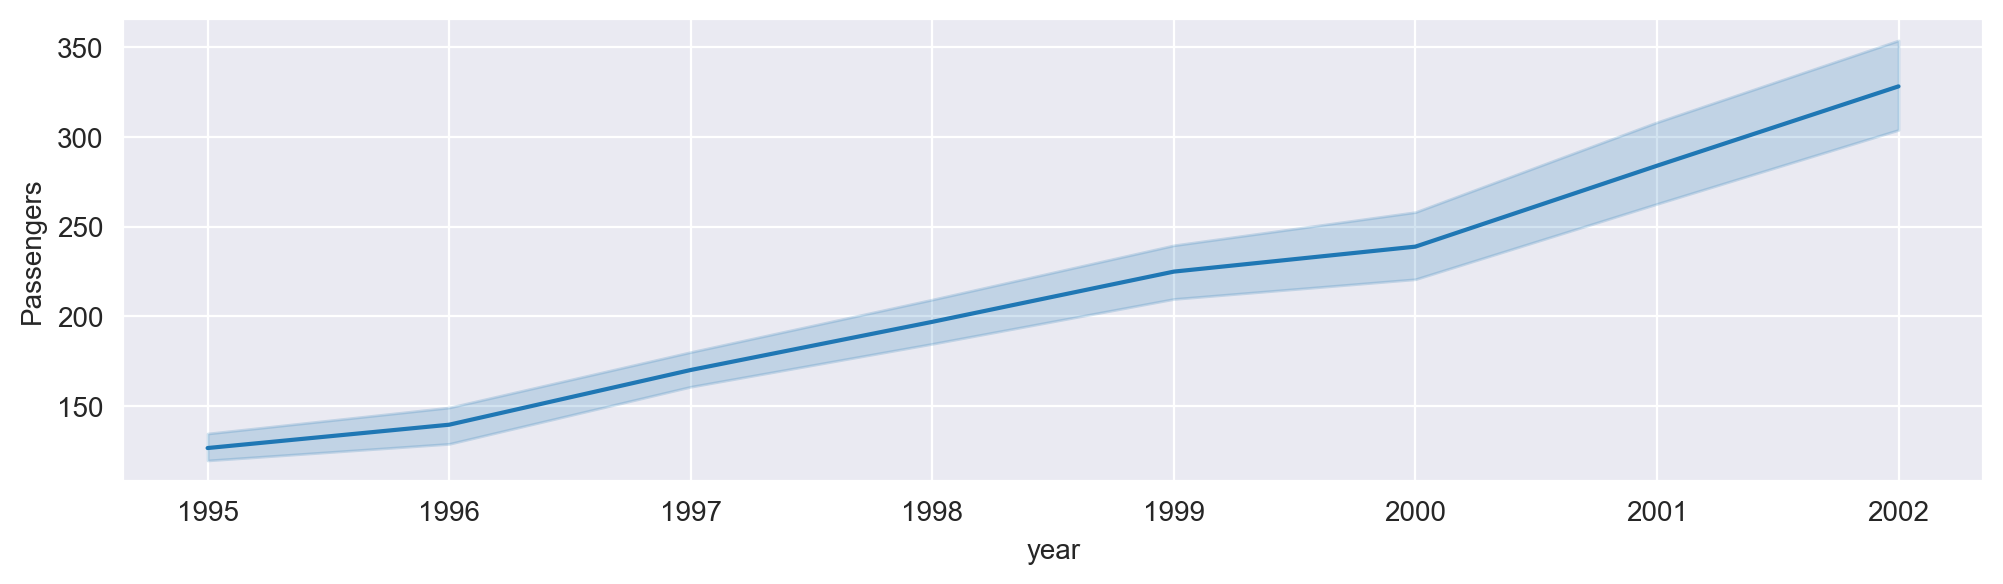

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

Text(0, 0.5, 'Autocorrelation (r2 value)')

<Figure size 3000x1600 with 0 Axes>

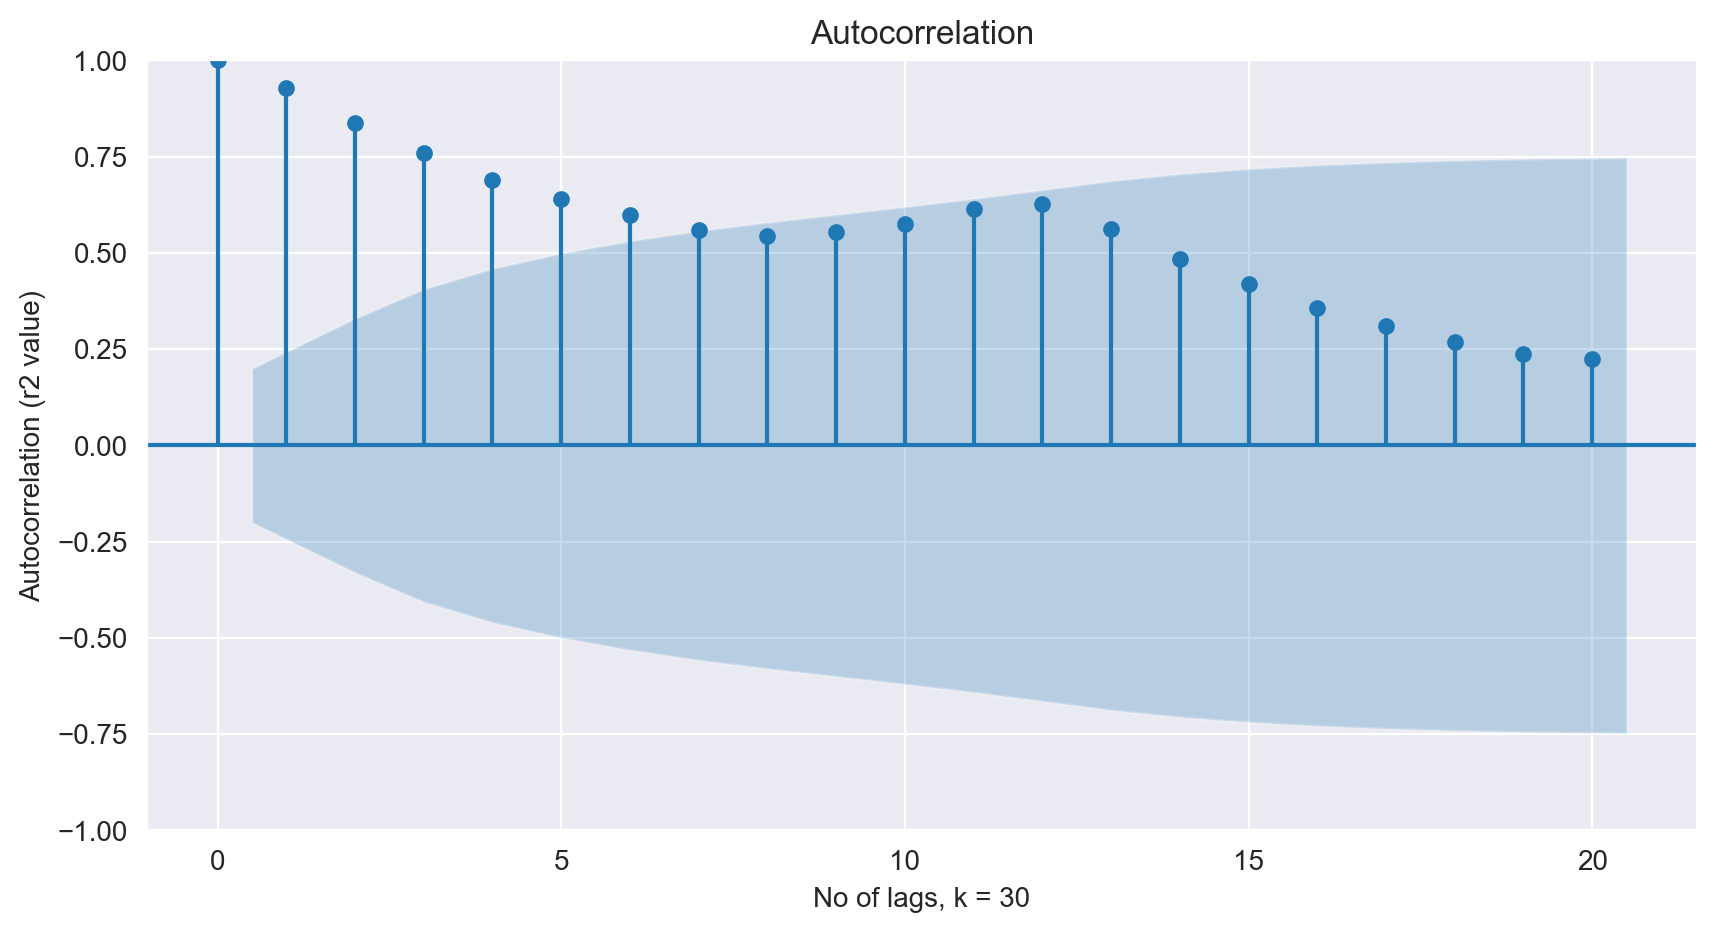

In [15]:
plt.figure(figsize = (15,8))
plot_acf(df['Passengers'])                                    
plt.xlabel("No of lags, k = 30")
plt.ylabel("Autocorrelation (r2 value)")

In [16]:
train=df.head(70)
test=df.tail(26)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Linear Model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

linear_model  = smf.ols('Passengers~t',data=train,).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_lm = np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_lm

48.30985585336209

In [19]:
# Exponential Model
exp_model = smf.ols('log_passengers~t',data=train,).fit()
pred_exp = pd.Series(exp_model.predict(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

298.12659699761343

In [20]:
#Quadratic Model
quad_model = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = quad_model.predict(test[["t", "t_squared"]])

rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

43.89814496742656

In [21]:
#Additive Seasonality
as_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_as = as_model.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_as = np.sqrt(mean_squared_error(test['Passengers'],pred_as))
rmse_as

124.97569951828822

In [22]:
#Additive Seasonality Quadratic
asq_model = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_asq = pd.Series(asq_model.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_asq = np.sqrt(mean_squared_error(test['Passengers'],pred_asq))
rmse_asq

30.39304289591171

In [23]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_ms = np.sqrt(mean_squared_error(test['Passengers'],pred_Mult_sea))
rmse_ms

298.6798189957354

In [24]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_mas = np.sqrt(mean_squared_error(test['Passengers'],pred_Mult_add_sea))
rmse_mas

298.1366141717191

In [25]:
#Multiplicative Seasonality Quadratic
mult_sea_Quad = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_msq = np.sqrt(mean_squared_error(test['Passengers'],pred_Mult_add_sea))
rmse_msq

298.1366141717191

In [26]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_lm,rmse_exp,rmse_quad,rmse_as,rmse_asq,rmse_ms,rmse_mas])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,30.393043
2,rmse_Quad,43.898145
0,rmse_linear,48.309856
3,rmse_add_sea,124.975700
1,rmse_Exp,298.126597
6,rmse_Mult_add_sea,298.136614
5,rmse_Mult_sea,298.679819
